In [35]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from EMD_lib import cubic_spline_3pts, EMD
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.svm import OneClassSVM
from data_preparation import get_data
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor as LOF

In [36]:
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')

/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 164019
before = 5
after = 5

# OCSVM
## original SSA 

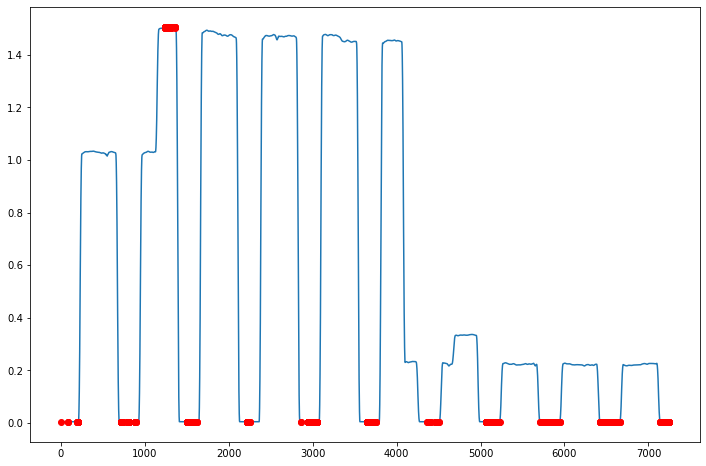

In [39]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one')[1:, np.newaxis]

nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

# OCSVM
## original multi SSA 

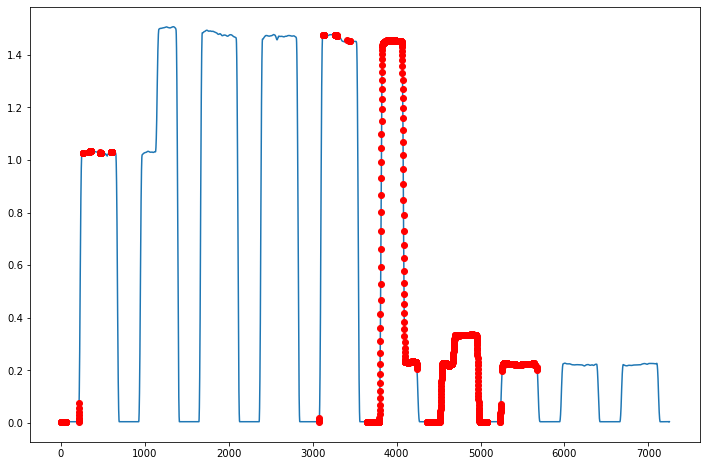

In [40]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi')[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi')[1:]

preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# OCSVM
## original multi_int SSA 2

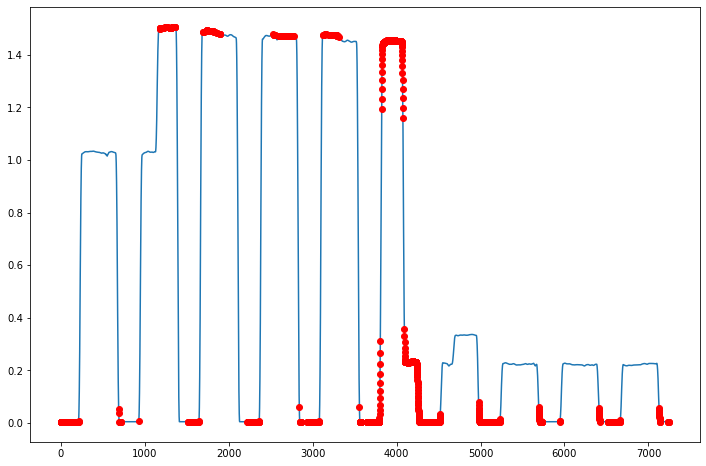

In [41]:
df = get_data(anom.loc[ind - 730 * before :ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=2)[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=2)[1:]

preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# OCSVM
## original multi_int SSA 5

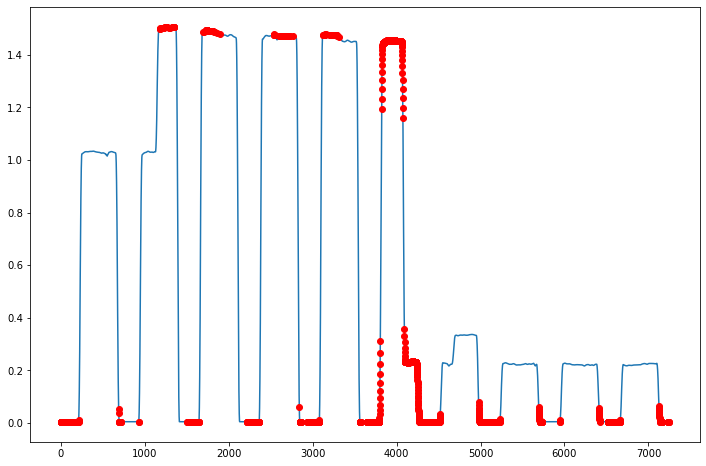

In [42]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=5)[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=5)[1:]

preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# OCSVM
## original multi_int SSA 15

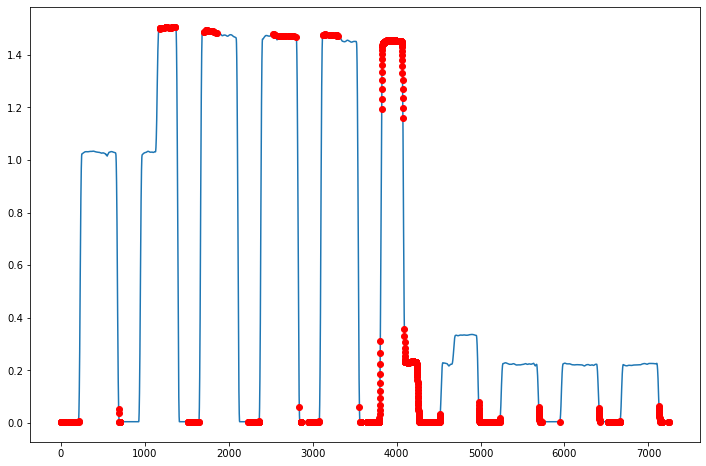

In [43]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=15)[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=15)[1:]

preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# OCSVM
## windows SSA 

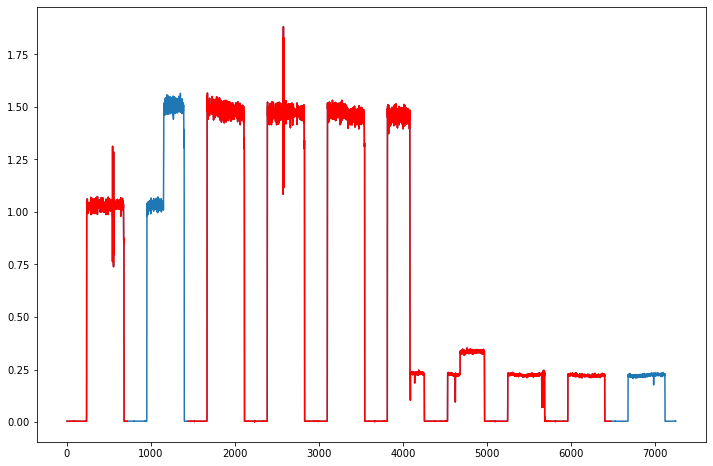

In [44]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='one')#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='one')#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# OCSVM
## windows multi_int SSA 2

In [45]:
k = 0
for i in df:
    print(len(i))
    df[k] = np.array(df[k])
    k += 1
df.shape

720
720
720
720
720
720
720
720
720


(9, 720)

In [46]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[  65  783 2216 2933 3649]
SMALL
3651
720
BIG
721
SMALL
3651
720
SMALL
3651
718


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.

# OCSVM
## windows multi_int SSA 5

In [18]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=5)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[ 756 1473 2189]
SMALL
2191
720
SMALL
2191
718


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.

# OCSVM
## windows multi_int SSA 15

[ 31 748]
SMALL
1461
720
[  31  748 1465 2182 2899 3616 4336 5056 5776]
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
720
720
720


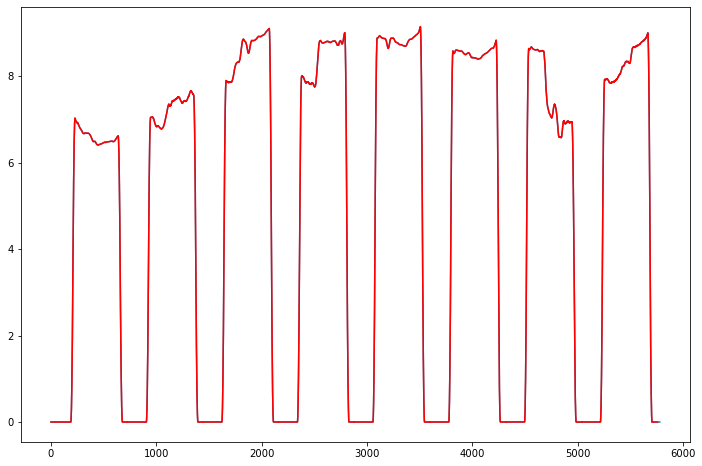

In [19]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=15)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# ==========================================================

# IF
## original SSA 

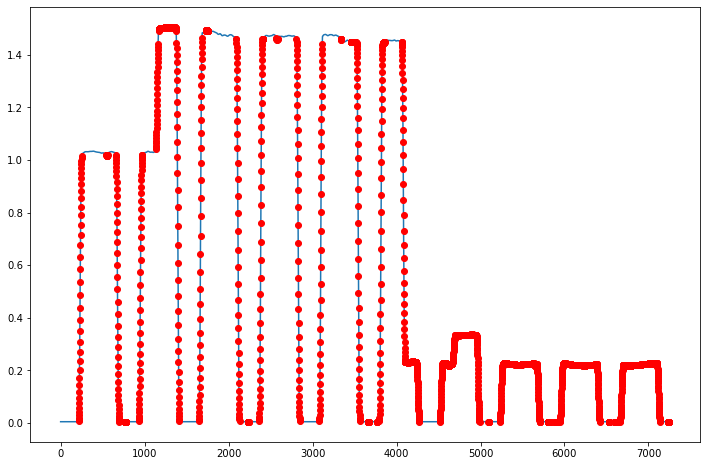

In [47]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one')[1:, np.newaxis]

nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one')[1:, np.newaxis]
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red', zorder=1)
plt.plot(np.arange(len(df)), df, zorder=0)

# IF
## original multi SSA 

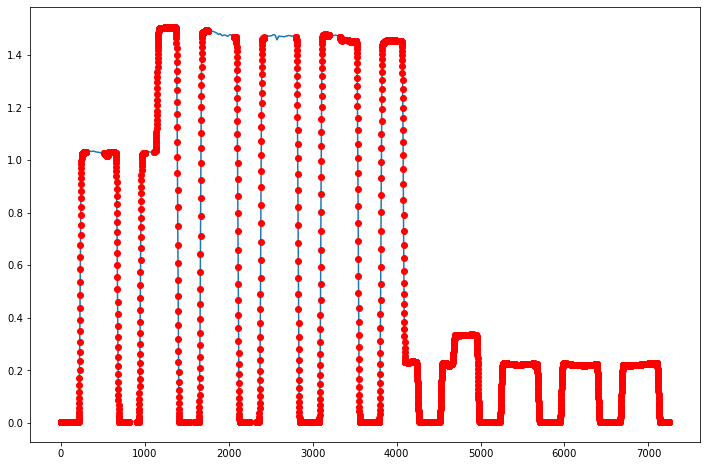

In [48]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi')[1:]
nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi')[1:]

preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# IF
## original multi_int SSA 2

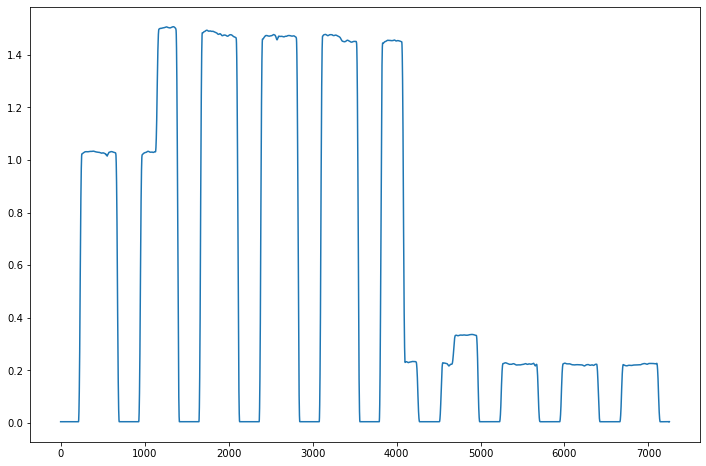

In [49]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=2)[1:]
nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=2)[1:]

preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# IF
## original multi_int SSA 5

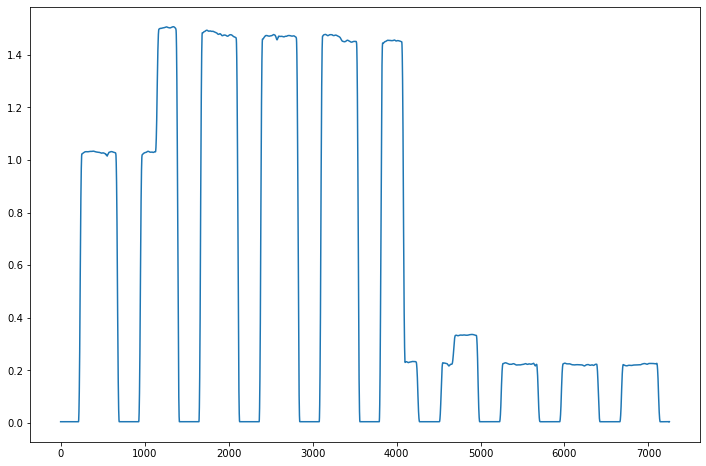

In [50]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=5)[1:]
nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=5)[1:]

preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# IF
## original multi_int SSA 15

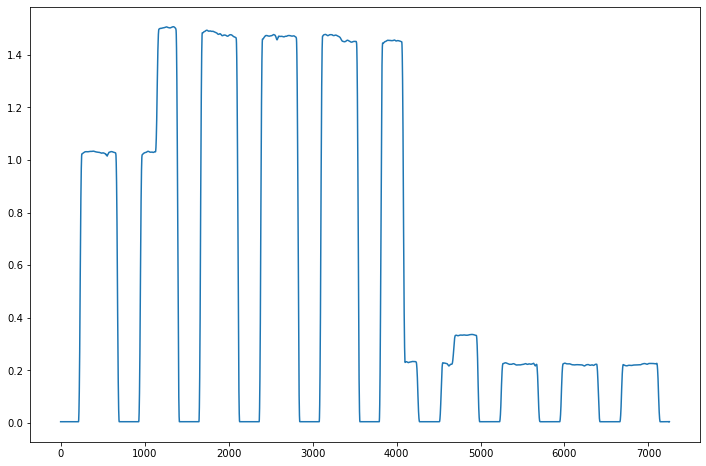

In [51]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=15)[1:]
nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=15)[1:]

preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)

# IF
## windows SSA 

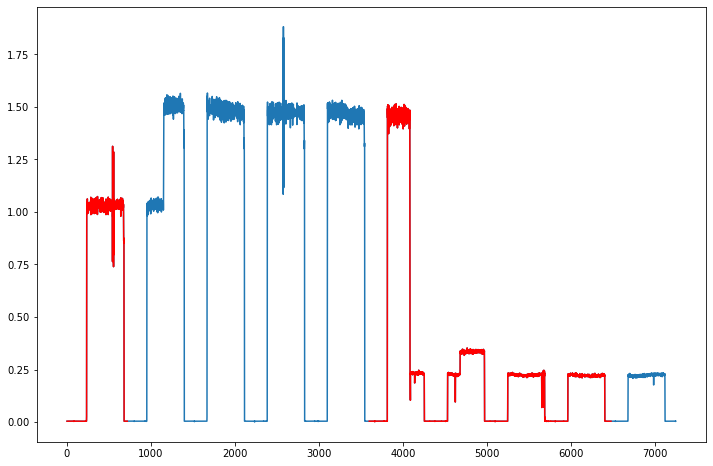

In [54]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='one')#[1:]
nu=0.05
model = IsolationForest()
model.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='one')#[1:]
preds = model.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# IF
## windows multi_int SSA 2

In [55]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
model = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
model.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=2)#[1:]
preds = model.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[  65  783 2216 2933 3649]
SMALL
3651
720
BIG
721
SMALL
3651
720
SMALL
3651
718


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.

# IF
## windows multi_int SSA 5

[ 31 748]
SMALL
1461
720
[  31  748 1465 2182 2899 3616 4336 5056 5776]
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
720
720
720


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths


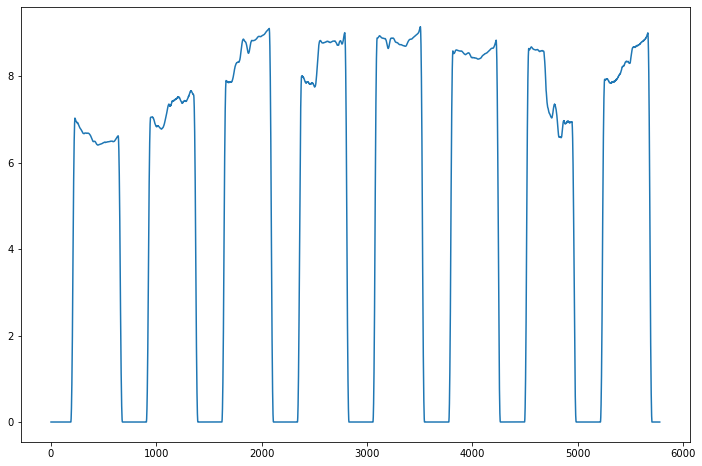

In [28]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=5)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# IF
## windows multi_int SSA 15

[ 31 748]
SMALL
1461
720
[  31  748 1465 2182 2899 3616 4336 5056 5776]
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
SMALL
5781
720
720
720
720


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths


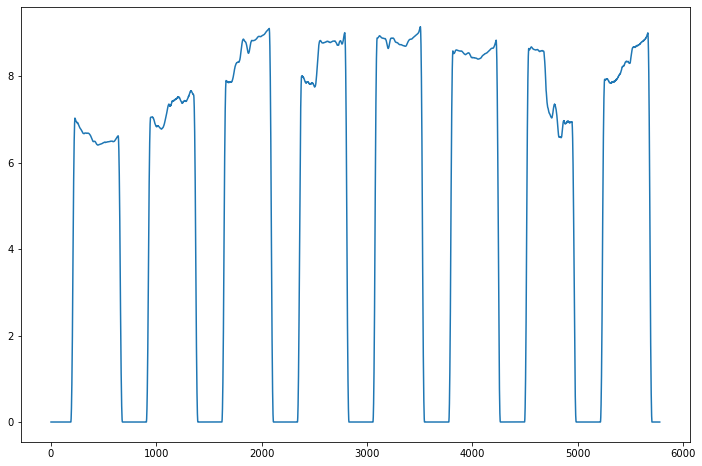

In [29]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest() # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=15)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# ==========================================================

# LOF
## original SSA 

In [30]:
n_neigh = 30

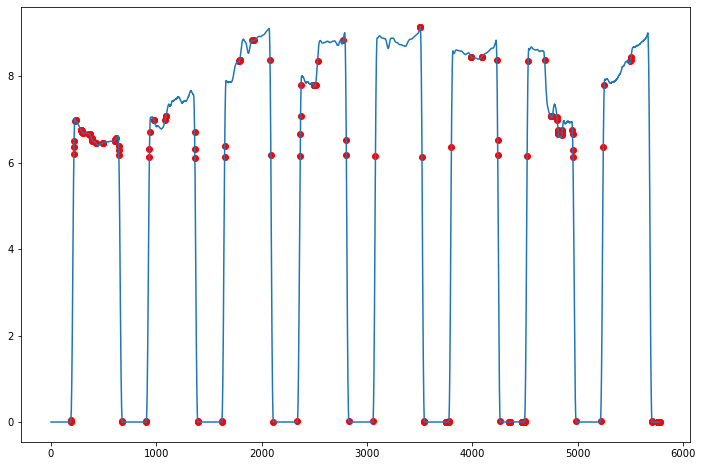

In [31]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one')[1:, np.newaxis]

model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

# LOF
## original multi SSA 

In [67]:
n_neigh = 10

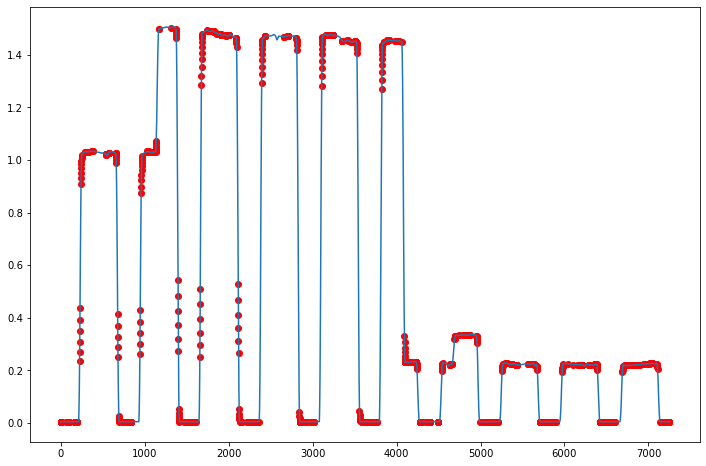

In [68]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi')[1:]
model = LOF(n_neighbors=n_neigh) 
preds = model.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

# LOF
## original multi_int SSA 2

In [60]:
n_neigh = 5

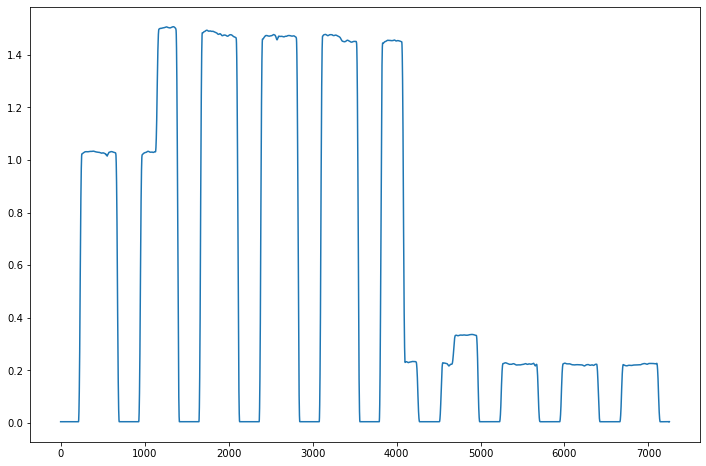

In [61]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=2)[1:]
ocsvm = LOF(n_neighbors=n_neigh)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

# LOF
## original multi_int SSA 5

In [62]:
n_neigh = 30

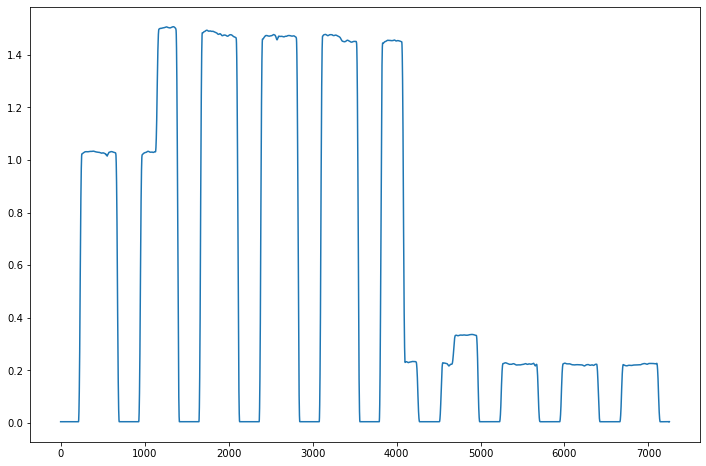

In [63]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=5)[1:]
ocsvm = LOF(n_neighbors=n_neigh)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

# LOF
## original multi_int SSA 15

In [64]:
n_neigh = 30

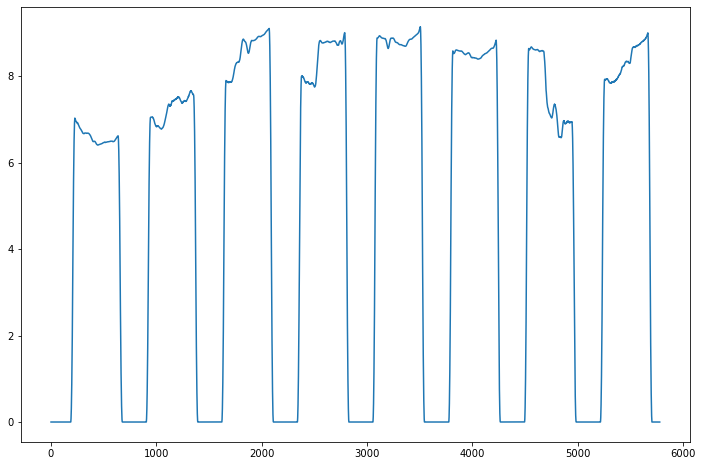

In [39]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='multi_intervals', intervals=15)[1:]
ocsvm = LOF(n_neighbors=n_neigh)
preds = ocsvm.fit_predict(df)
plt.figure(figsize=(12, 8))
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red', zorder=1)
plt.plot(np.arange(len(df)), df[:, 0], zorder=0)

# LOF
## windows SSA 

In [40]:
n_neigh = 10

/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:274: UserWarning: n_neighbors (10) is greater than the total number of samples (8). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn("n_neighbors (%s) is greater than the "


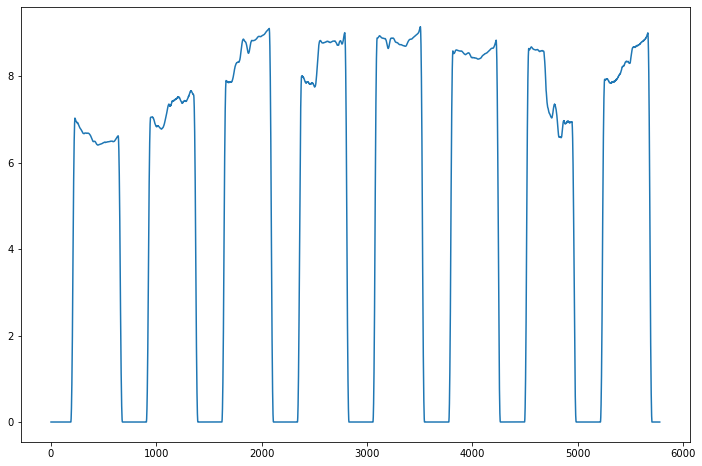

In [41]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='one')#[1:]
nu=0.05
ocsvm = LOF(n_neighbors=n_neigh)
preds = ocsvm.fit_predict(df)

data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] == -1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# LOF
## windows multi_int SSA 2

In [69]:
n_neigh = 100

In [70]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=2)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[  65  783 2216 2933 3649 4364 5080 5797 6513 7229]
SMALL
7251
720
BIG
721
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.

# LOF
## windows multi_int SSA 5

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=5)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=5)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

# LOF
## windows multi_int SSA 15

In [71]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, ssa=True, dimension='multi_intervals', intervals=15)#[1:]
preds = LOF().fit_predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, ssa=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

[  65  783 2216 2933 3649 4364 5080 5797 6513 7229]
SMALL
7251
720
BIG
721
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720
SMALL
7251
720


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:273: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X)


ValueError: setting an array element with a sequence.